# Housing Prices Prediction Model through Linear Regression & More

I will be making a bunch of ML models to predict housing prices based on a bunch of metrics via a kaggle competition dataset.


### Importing Libraries Needed

In [41]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import optuna


from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import StackingRegressor
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

### Now to import the training and test data

Read more about the data and variables [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).


In [15]:
train_data = pd.read_csv("train.csv") #import training data
train_data.head() #first 6 rows including labels


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
test_data = pd.read_csv("test.csv") #import test data
test_data.head() #first 6 rows including labels

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [47]:
corr_y = train_data.corr()
corr_y['SalePrice'].sort_values(ascending=False).abs()[1:]

ValueError: could not convert string to float: 'RL'

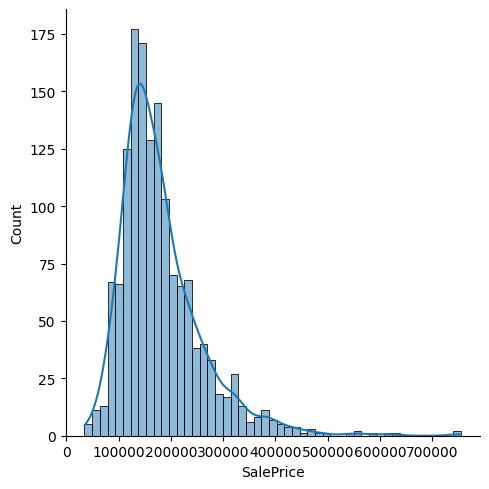

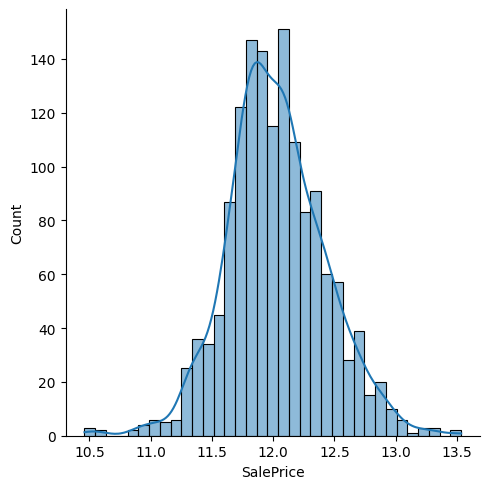

In [45]:
#corr = train_data.corr()
#sns.heatmap(corr, cmap='viridis')
#sns.heatmap(train_test[numerical].corr(),annot=True)
sns.displot(train_data['SalePrice'], kde=True)
sns.displot(np.log(train_data['SalePrice']), kde=True) #base e

### Data Cleanup
As we can see there are many missing values within some parameters that the model will be using to make predictions. 
\
I will use KNN (K-Nearest Neighbors) imputation, which will find the k nearest neighbors based on the other features to impute (or infer) the missing value.

In [18]:
train_data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [38]:
x_train, y_train = train_data.drop(columns='SalePrice'), train_data['SalePrice']
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()
print(len(categorical_cols))
print(categorical_cols)
#x_test, y_test = test_data.drop(columns='SalePrice'), test_data['SalePrice']


43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
def evaluate_knn_imputation_rmse(x_train, y_train, k_range=range(1, 16)): #rmse root mean squared error evaluation
    """
    Evaluates the RMSE of KNN imputation for different k values.

    Args:
        x_train: Training features.
        y_train: Training target variable.
        k_range: Range of k values to evaluate (default 1 to 15).

    Returns:
        A dictionary containing k values and their corresponding RMSE scores.
    """
    rmse_results = {}
    for k in k_range:
        # 1. Impute missing values using KNN
        imputer = KNNImputer(n_neighbors=k)
        x_train_imputed = imputer.fit_transform(x_train)

        # 2. Split data for evaluation (if necessary)
        # ... (split into x_train, x_test, y_train, y_test if you want to evaluate on a separate test set)

        # 3. Predict target values using imputed x_train
        knn = KNeighborsRegressor(n_neighbors=k)  # Create a new KNN model for prediction
        knn.fit(x_train_imputed, y_train)
        y_pred = knn.predict(x_train_imputed)

        # 4. Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_train, y_pred))
        rmse_results[k] = rmse

    return rmse_results